<h1> Tenzing Palden Car Dealership Data in NYC
</h1>

In [26]:
#get dataset into the file
df_1 <- read.csv("Car details v3.csv")

In [27]:
#import packages needed for project
library(tidyverse)
library(stringr)
library(purrr)
library(randomForest)
library(broom)
library(Amelia)
library(GGally)
library(caret)
library(relaimpo)
library(gbm)

In [28]:
head(df_1)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
,<chr>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>
1,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5
2,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5
3,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5
4,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5
5,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5
6,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5


<h1> This is the start of data exploration part of the project.</h1>
<h1> Visualization and Data cleaning will be done to understand the data better</h1>

In [29]:
#taking the fitst word from the name because that shows the brand of the car
df_1$name <- word(df_1$name,1)

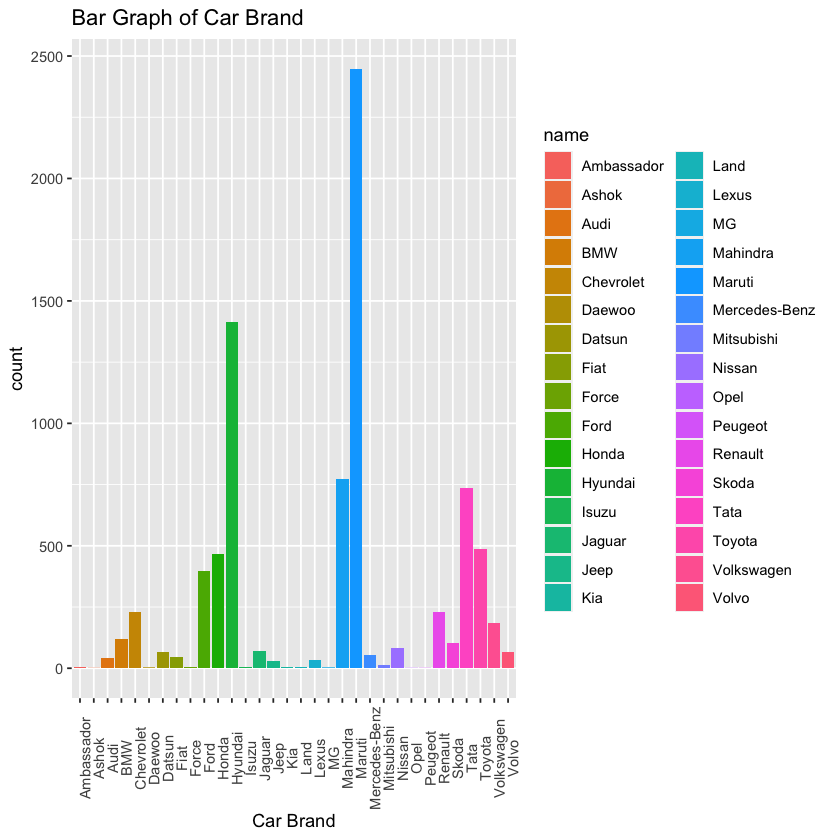

In [30]:
#Plotting car name to check the distribution
ggplot(data = df_1, aes(x=name, fill = name)) +
  geom_bar() + labs(x='Car Brand') + labs(title = "Bar Graph of Car Brand") +
  theme(axis.text.x = element_text(angle = 90))

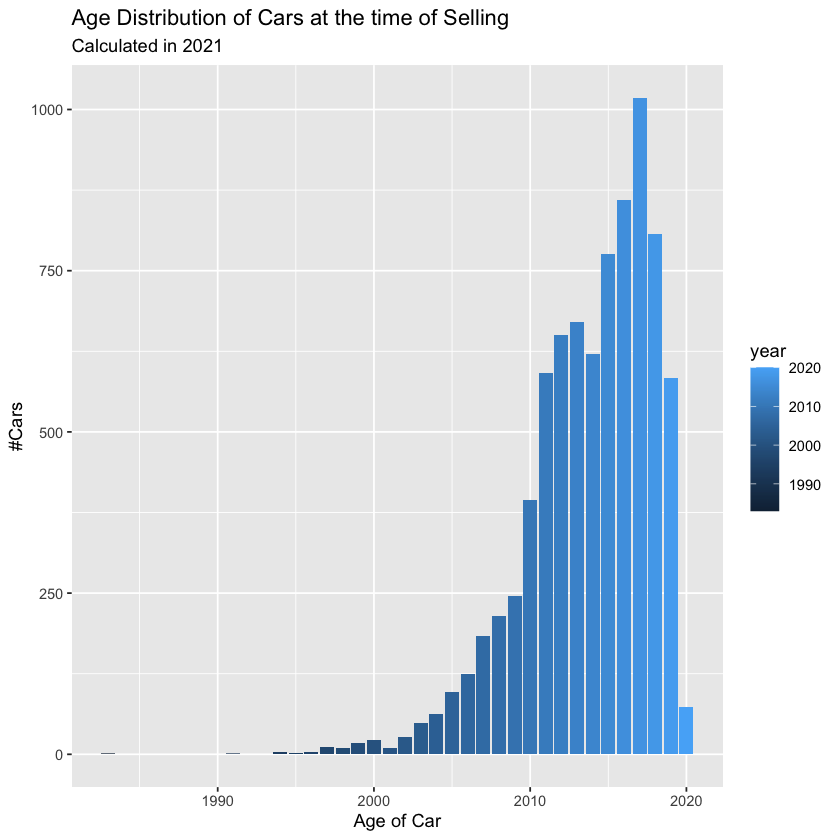

In [31]:
df_1%>%
group_by(year)%>%
count()%>%
ggplot()+geom_col(aes(y=n,x=year, fill=year))+
labs(title = 'Age Distribution of Cars at the time of Selling',
     subtitle= 'Calculated in 2021',
    x= 'Age of Car',
    y='#Cars')

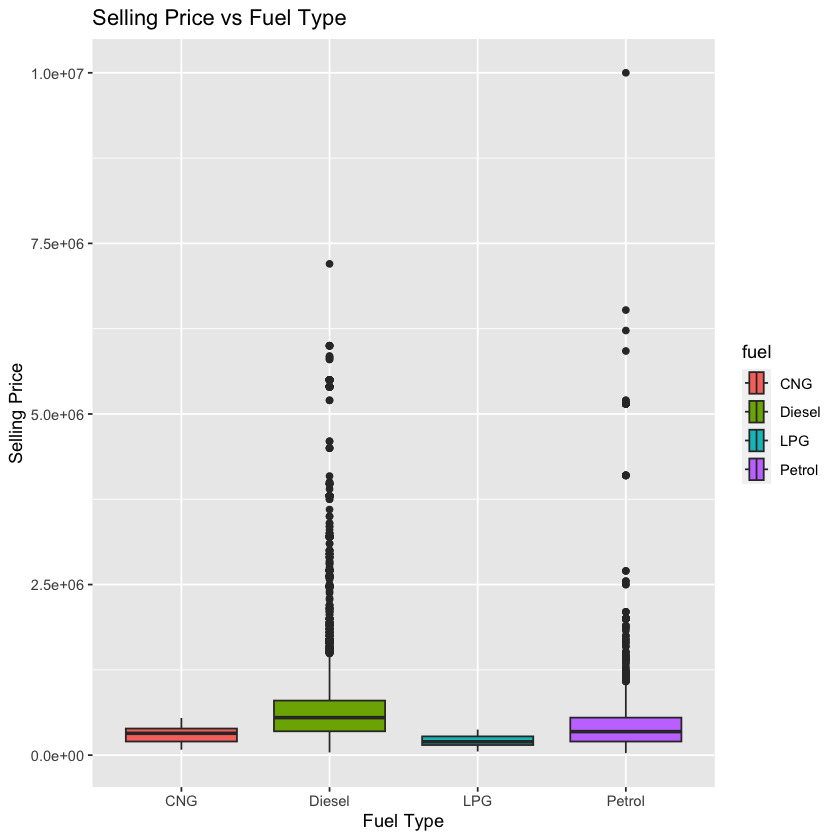

In [32]:
df_1 %>%
    ggplot()+
    geom_boxplot(aes(selling_price, fuel, fill=fuel))+
    coord_flip()+
    labs(x="Selling Price",y="Fuel Type")+
    ggtitle("Selling Price vs Fuel Type")

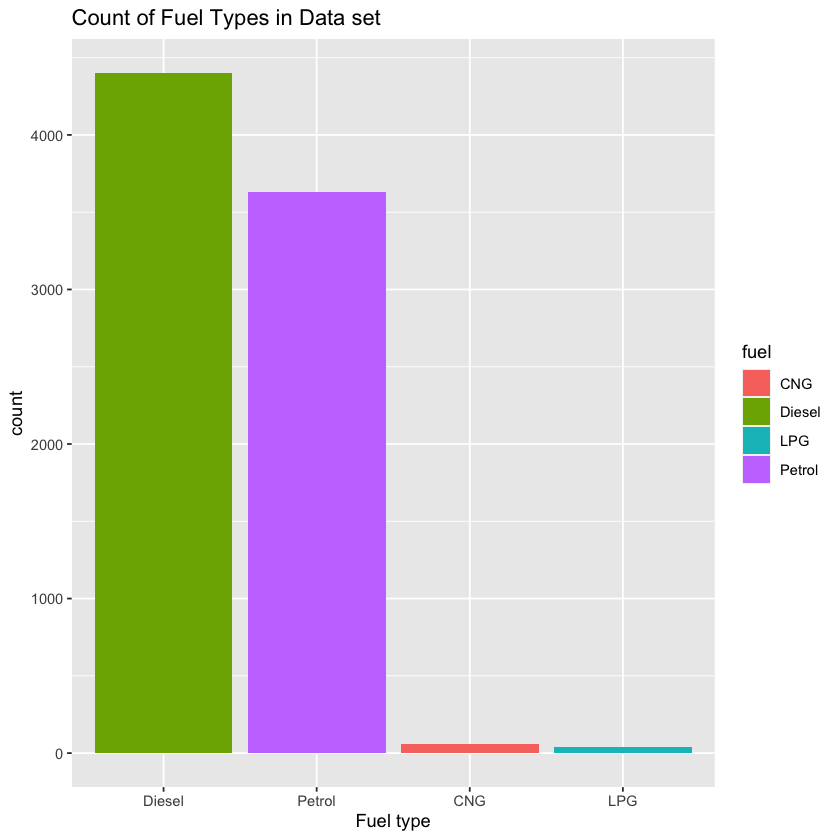

In [33]:
# Bar graph of Fuel
ggplot(data = df_1, aes(x=reorder(fuel, fuel, function(x)-length(x)), fill = fuel)) +
  geom_bar() + labs(x='Fuel type') + labs(title = "Count of Fuel Types in Data set")

In [34]:
#Removing unit from mileage, converting it to numeric value and replacing the missing values
df_1$mileage <- str_replace(df_1$mileage, 'kmpl', '')
df_1$mileage <- str_replace(df_1$mileage, 'km/kg', '')
df_1$mileage <- as.numeric(df_1$mileage)
df_1$mileage[is.na(df_1$mileage)]<-mean(df_1$mileage,na.rm=TRUE)

In [35]:
#Removing unit from engine, converting it to numeric value and replacing the missing values

df_1$engine <- str_replace(df_1$engine, 'CC', '')
df_1$engine <- as.numeric(df_1$engine)
df_1$engine[is.na(df_1$engine)]<-mean(df_1$engine,na.rm=TRUE)

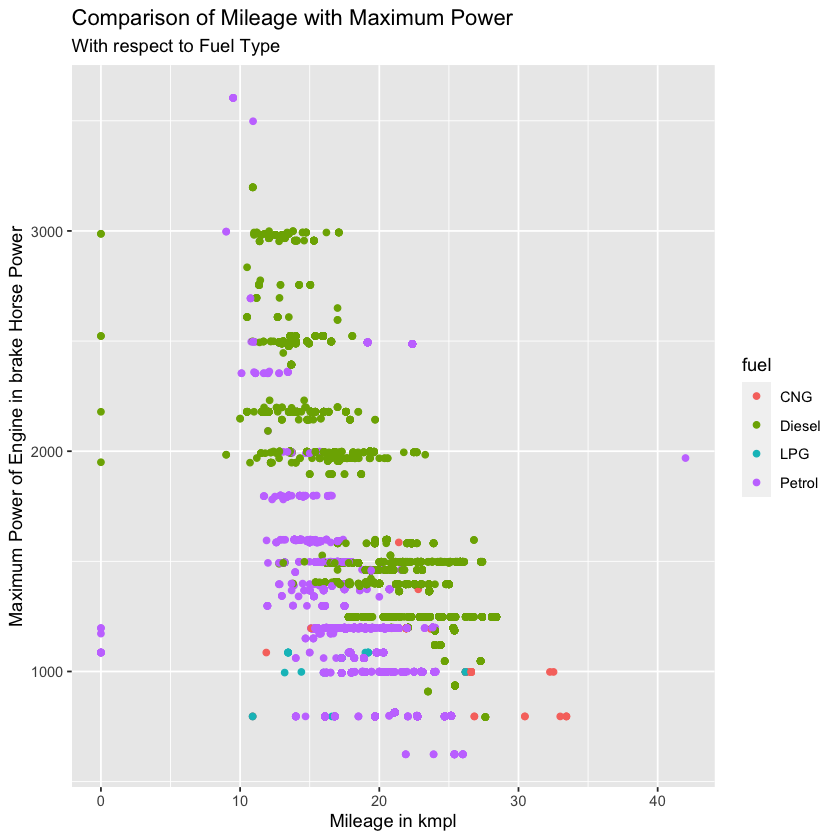

In [36]:
df_1%>%
ggplot()+geom_point(aes(x=mileage,y=engine,color = fuel))+ 
labs(title = 'Comparison of Mileage with Maximum Power ',
     subtitle = 'With respect to Fuel Type',
    x= 'Mileage in kmpl',
    y='Maximum Power of Engine in brake Horse Power') 

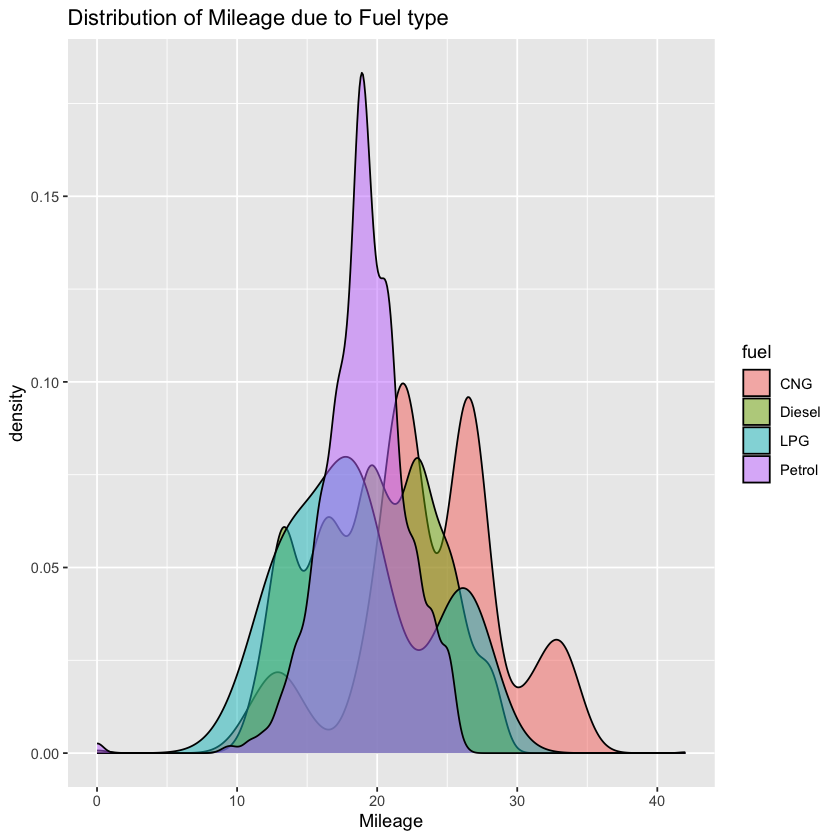

In [37]:
options(warn=-1)
df_1 %>%
ggplot(aes(x=mileage,fill=fuel))+
geom_density(alpha = 0.5)+
labs(title = 'Distribution of Mileage due to Fuel type',
    x= 'Mileage')

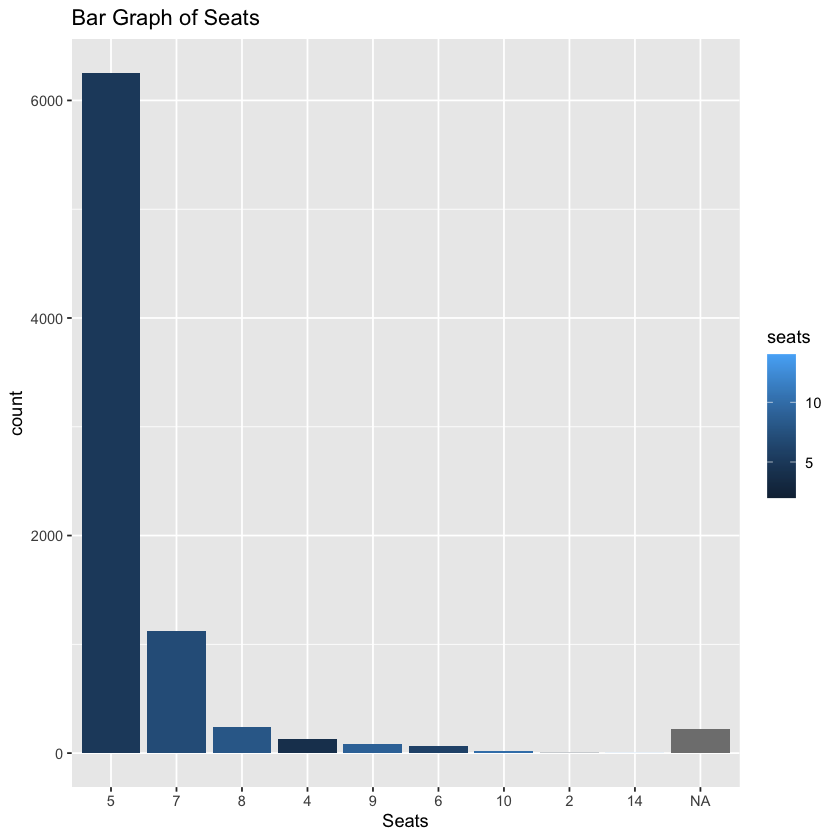

In [38]:
# Bar graph of seats
ggplot(data = df_1, aes(x=reorder(seats, seats, function(x)-length(x)), fill = seats)) +
  geom_bar() + labs(x='Seats') + labs(title = "Bar Graph of Seats")

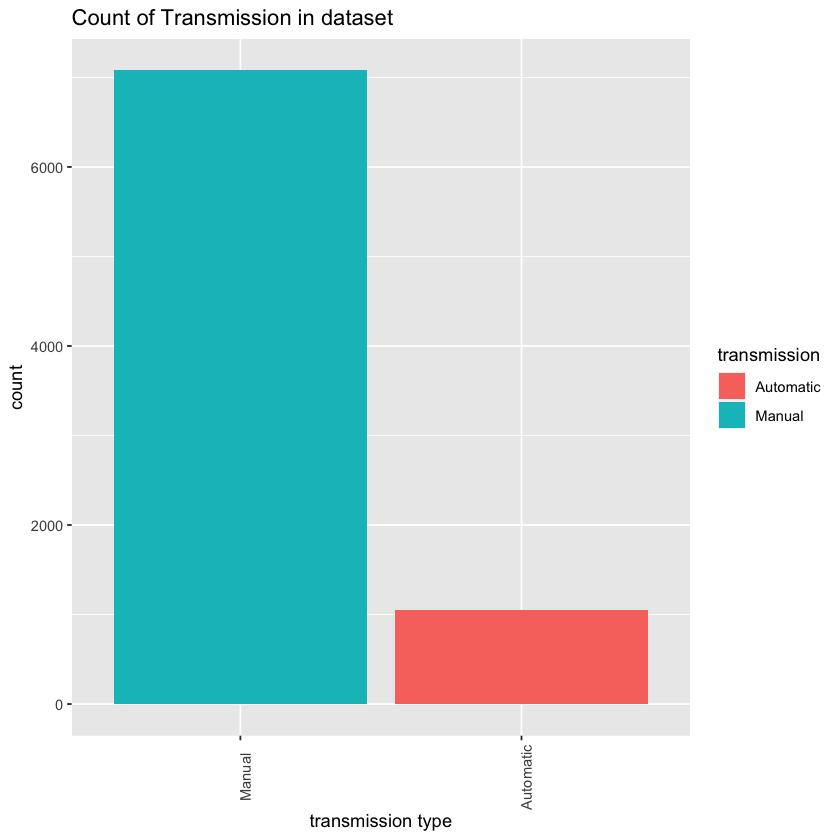

In [39]:
# Bar graph of seats
ggplot(data = df_1, aes(x=reorder(transmission, transmission, function(x)-length(x)), fill = transmission)) +
  geom_bar() + labs(x='transmission type') + labs(title = "Count of Transmission in dataset") +theme(axis.text.x = element_text(angle = 90))

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


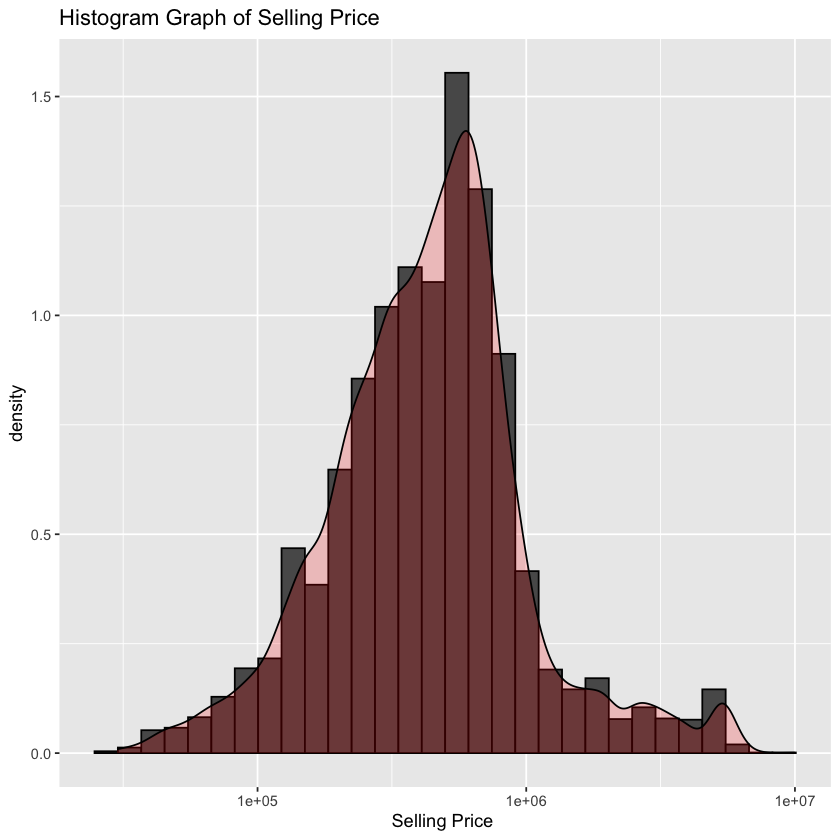

In [40]:
#Histogram of Selling Price
ggplot(df_1, aes(x=selling_price)) + 
  geom_histogram(aes(y=..density..), colour="black")+
  geom_density(alpha=.2, fill="red")+
  labs(x='Selling Price ') + labs(title = "Histogram Graph of Selling Price") +
  scale_x_continuous(trans='log10')

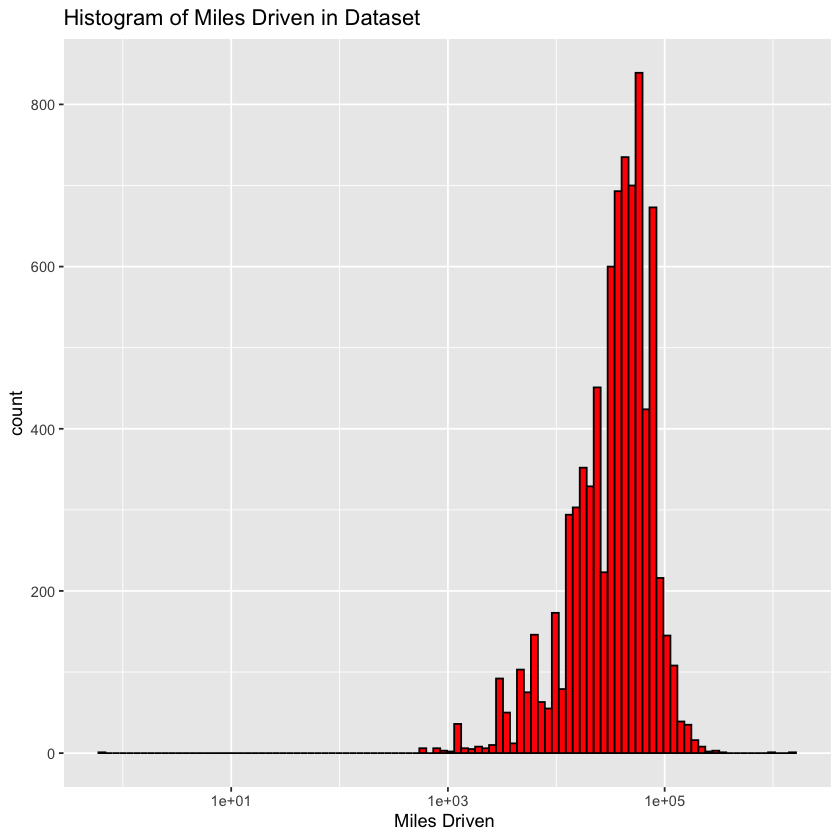

In [41]:
#Histogram of Km Driven
ggplot(df_1, aes(x=km_driven*0.621371)) + 
  geom_histogram(color="black", fill="red", bins = 100)+
  labs(x='Miles Driven ') + labs(title = "Histogram of Miles Driven in Dataset") +
  scale_x_continuous(trans='log10')

<h1> In this part, we will be converting string values to integers.</h1>
<h1> This will allow the Regression analysis to be conducted</h1>


In [42]:
#removing torque because that is not important to this analysis
df_1 <- subset (df_1, select = -torque)

In [43]:
#changing car names to integers 

df_1$name <- str_replace(df_1$name, 'Maruti', '0')
df_1$name <- str_replace(df_1$name, 'Skoda', '1')
df_1$name <- str_replace(df_1$name, 'Honda', '2')
df_1$name <- str_replace(df_1$name, 'Hyundai', '3')
df_1$name <- str_replace(df_1$name, 'Toyota', '4')
df_1$name <- str_replace(df_1$name, 'Ford', '5')
df_1$name <- str_replace(df_1$name, 'Renault', '6')
df_1$name <- str_replace(df_1$name, 'Mahindra', '7')
df_1$name <- str_replace(df_1$name, 'Tata', '8')
df_1$name <- str_replace(df_1$name, 'Chevrolet', '9')
df_1$name <- str_replace(df_1$name, 'Fiat', '10')
df_1$name <- str_replace(df_1$name, 'Datsun', '11')
df_1$name <- str_replace(df_1$name, 'Jeep', '12')
df_1$name <- str_replace(df_1$name, 'Mercedes-Benz', '13')
df_1$name <- str_replace(df_1$name, 'Mitsubishi', '14')
df_1$name <- str_replace(df_1$name, 'Audi', '15')
df_1$name <- str_replace(df_1$name, 'Volkswagen', '16')
df_1$name <- str_replace(df_1$name, 'BMW', '17')
df_1$name <- str_replace(df_1$name, 'Nissan', '18')
df_1$name <- str_replace(df_1$name, 'Lexus', '19')
df_1$name <- str_replace(df_1$name, 'Jaguar', '20')
df_1$name <- str_replace(df_1$name, 'Land', '21')
df_1$name <- str_replace(df_1$name, 'MG', '22')
df_1$name <- str_replace(df_1$name, 'Volvo', '23')
df_1$name <- str_replace(df_1$name, 'Daewoo', '24')
df_1$name <- str_replace(df_1$name, 'Kia', '25')
df_1$name <- str_replace(df_1$name, 'Force', '26')
df_1$name <- str_replace(df_1$name, 'Ambassador', '27')
df_1$name <- str_replace(df_1$name, 'Ashok', '28')
df_1$name <- str_replace(df_1$name, 'Isuzu', '29')
df_1$name <- str_replace(df_1$name, 'Opel', '30')
df_1$name <- str_replace(df_1$name, 'Peugeot', '31')

#Converting car name from categorical to numerical value

df_1$name <- as.numeric(df_1$name)
table(df_1$name)


   0    1    2    3    4    5    6    7    8    9   10   11   12   13   14   15 
2448  105  467 1415  488  397  228  772  734  230   47   65   31   54   14   40 
  16   17   18   19   20   21   22   23   24   25   26   27   28   29   30   31 
 186  120   81   34   71    6    3   67    3    4    6    4    1    5    1    1 

In [44]:
#Removing unit from mileage, converting it to numeric value and replacing the missing values
df_1$mileage <- str_replace(df_1$mileage, 'kmpl', '')
df_1$mileage <- str_replace(df_1$mileage, 'km/kg', '')
df_1$mileage <- as.numeric(df_1$mileage)
df_1$mileage[is.na(df_1$mileage)]<-mean(df_1$mileage,na.rm=TRUE)

In [45]:
#Removing unit from engine, converting it to numeric value and replacing the missing values

df_1$engine <- str_replace(df_1$engine, 'CC', '')
df_1$engine <- as.numeric(df_1$engine)
df_1$engine[is.na(df_1$engine)]<-mean(df_1$engine,na.rm=TRUE)

In [46]:
#Converting seats to numeric value and replacing the missing values
df_1$seats <- as.numeric(df_1$seats)
df_1$seats[is.na(df_1$seats)]<-median(df_1$seats,na.rm=TRUE)

In [47]:
#Removing unit from max_power, converting it to numeric value and replacing the missing values
df_1$max_power <- str_replace(df_1$max_power, 'bhp', '')
df_1$max_power <- as.numeric(df_1$max_power)
df_1$max_power[is.na(df_1$max_power)]<-mean(df_1$max_power,na.rm=TRUE)

In [48]:
#Converting fuel into integers
df_1$fuel <- str_replace(df_1$fuel, 'Diesel', "0")
df_1$fuel <- str_replace(df_1$fuel, 'Petrol', "1")
df_1$fuel <- str_replace(df_1$fuel, 'CNG', "2")
df_1$fuel <- str_replace(df_1$fuel, 'LPG', "3")
df_1$fuel <- as.numeric(df_1$fuel)
table(df_1$fuel)


   0    1    2    3 
4402 3631   57   38 

In [49]:
#Transmission to  binary 0 if Manual and 1 if Automatic
df_1$transmission <- str_replace(df_1$transmission, 'Manual', "0")
df_1$transmission <- str_replace(df_1$transmission, 'Automatic', "1")
df_1$transmission <- as.numeric(df_1$transmission)
table(df_1$transmission)


   0    1 
7078 1050 

In [50]:
#Converting owner into integers
df_1$owner <- str_replace(df_1$owner, 'First Owner', "0")
df_1$owner <- str_replace(df_1$owner, 'Second Owner', "1")
df_1$owner <- str_replace(df_1$owner, 'Third Owner', "2")
df_1$owner <- str_replace(df_1$owner, 'Fourth & Above Owner', "3")
df_1$owner <- str_replace(df_1$owner, 'Test Drive Car', "4")
df_1$owner <- as.numeric(df_1$owner)
table(df_1$owner)


   0    1    2    3    4 
5289 2105  555  174    5 

In [51]:
#Converting seller_type into Ordinal Encoder
df_1$seller_type <- str_replace(df_1$seller_type, "Trustmark Dealer", "0")
df_1$seller_type <- str_replace(df_1$seller_type, "Dealer", "1")
df_1$seller_type <- str_replace(df_1$seller_type, "Individual", "2")
df_1$seller_type <- as.numeric(df_1$seller_type)
table(df_1$seller_type)


   0    1    2 
 236 1126 6766 

<h1> Checking for Missing values within our dataset</he>

In [52]:
# Checking for missing values
sapply(df_1, function(x) sum(is.na(x)))

name          year selling_price     km_driven          fuel 
            0             0             0             0             0 
  seller_type  transmission         owner       mileage        engine 
            0             0             0             0             0 
    max_power         seats 
            0             0

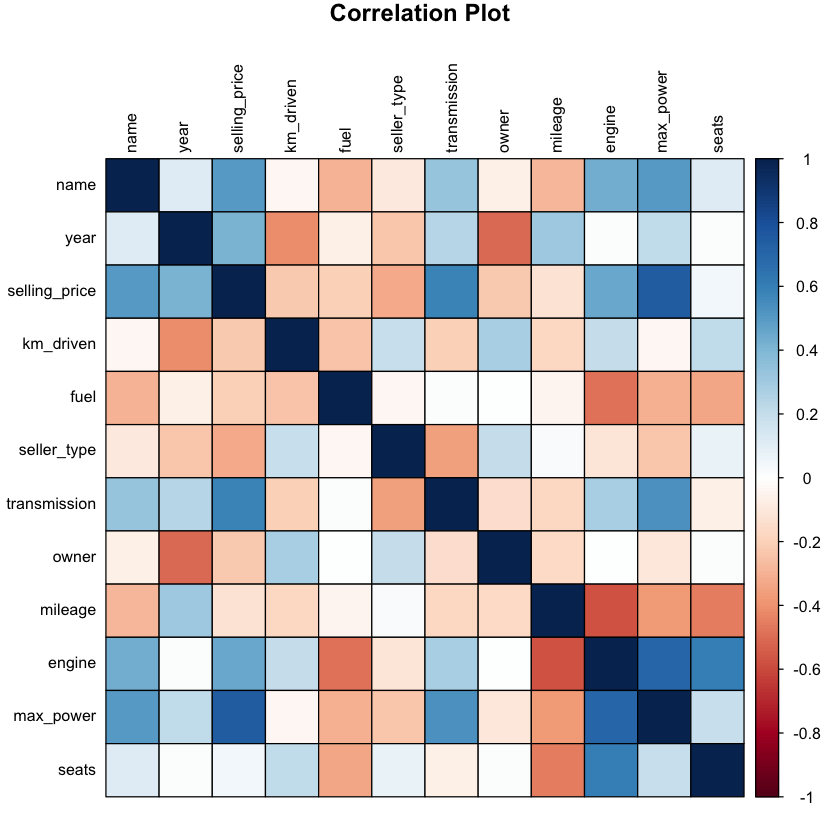

In [53]:
library(corrplot)

corrplot(cor(df_1), type="full", 
         method ="color", title = "Correlation Plot", 
         mar=c(0,0,1,0), tl.cex= 0.8, outline= T, tl.col="black")

We can see that selling price is highly correlated to max_power then transmission and name.

<h1> This will mark the Start of the regression part of the project
</h1>

In [54]:
set.seed(100)
subset<-sample(nrow(df_1),nrow(df_1)*0.8)
trainSet<-df_1[subset,]
testSet<-df_1[-subset,]

In [55]:
#linear regression
first_lr <- lm(selling_price ~ ., data = trainSet)
summary(first_lr)


Call:
lm(formula = selling_price ~ ., data = trainSet)

Residuals:
     Min       1Q   Median       3Q      Max 
-2319582  -213499    -4783   157083  4187376 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -6.798e+07  3.859e+06 -17.618  < 2e-16 ***
name          2.489e+04  1.346e+03  18.486  < 2e-16 ***
year          3.340e+04  1.929e+03  17.312  < 2e-16 ***
km_driven    -8.877e-01  1.129e-01  -7.860 4.48e-15 ***
fuel         -5.309e+02  1.417e+04  -0.037    0.970    
seller_type  -1.135e+05  1.337e+04  -8.491  < 2e-16 ***
transmission  4.291e+05  2.189e+04  19.600  < 2e-16 ***
owner        -7.013e+03  9.128e+03  -0.768    0.442    
mileage       1.868e+04  2.233e+03   8.366  < 2e-16 ***
engine        3.172e+01  2.521e+01   1.258    0.208    
max_power     1.221e+04  2.836e+02  43.053  < 2e-16 ***
seats        -1.158e+04  8.797e+03  -1.316    0.188    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 4524

eliminate all features with P values above 0.05

In [56]:
main_lr <- lm(selling_price ~ name+ year+ km_driven+ seller_type +transmission + mileage + max_power, data = trainSet)
summary(main_lr)


Call:
lm(formula = selling_price ~ name + year + km_driven + seller_type + 
    transmission + mileage + max_power, data = trainSet)

Residuals:
     Min       1Q   Median       3Q      Max 
-2311732  -214276    -2576   156140  4143775 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -6.824e+07  3.425e+06 -19.927  < 2e-16 ***
name          2.519e+04  1.296e+03  19.444  < 2e-16 ***
year          3.351e+04  1.707e+03  19.632  < 2e-16 ***
km_driven    -8.818e-01  1.074e-01  -8.209 2.66e-16 ***
seller_type  -1.164e+05  1.322e+04  -8.805  < 2e-16 ***
transmission  4.307e+05  2.132e+04  20.200  < 2e-16 ***
mileage       1.874e+04  1.698e+03  11.034  < 2e-16 ***
max_power     1.244e+04  2.217e+02  56.107  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 452300 on 6494 degrees of freedom
Multiple R-squared:  0.684,	Adjusted R-squared:  0.6837 
F-statistic:  2008 on 7 and 6494 DF,  p-value: < 2.2e-16


In [57]:
main_lr


Call:
lm(formula = selling_price ~ name + year + km_driven + seller_type + 
    transmission + mileage + max_power, data = trainSet)

Coefficients:
 (Intercept)          name          year     km_driven   seller_type  
  -6.824e+07     2.519e+04     3.351e+04    -8.818e-01    -1.164e+05  
transmission       mileage     max_power  
   4.307e+05     1.874e+04     1.244e+04  


In [ ]:
y=-68240000 + 25190x + 33510x+ -0.8818x +  -116400x + 430700x+ 18740x+ 12440x

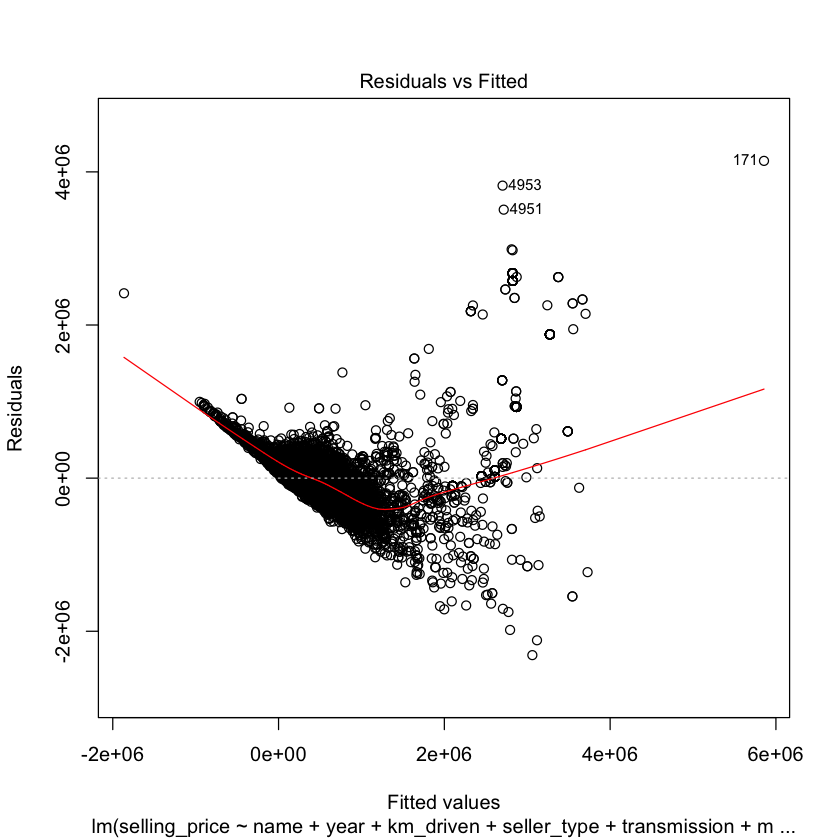

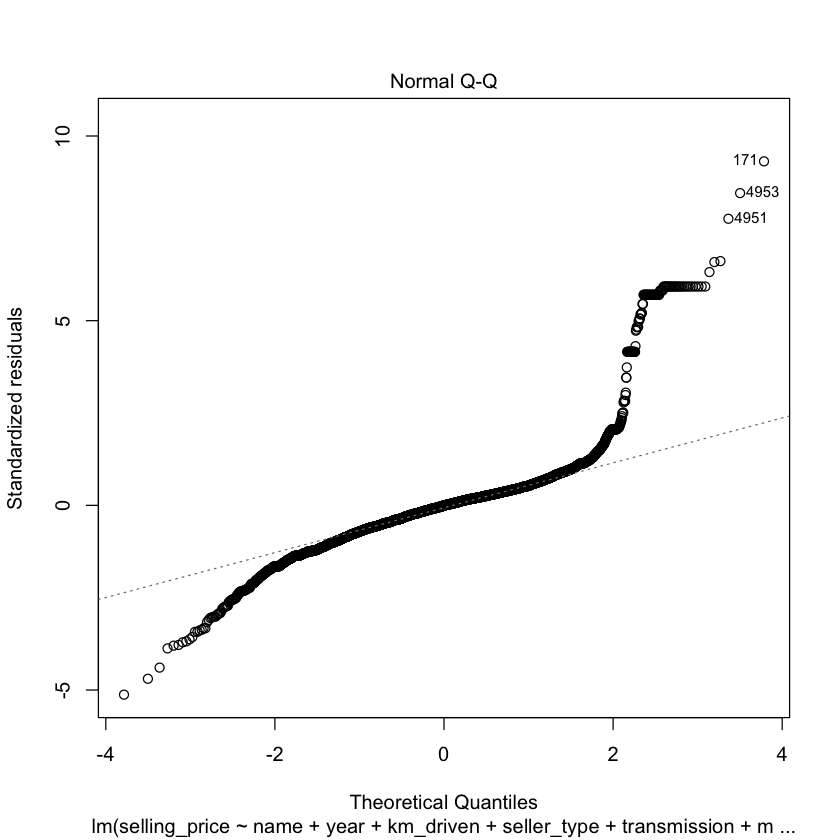

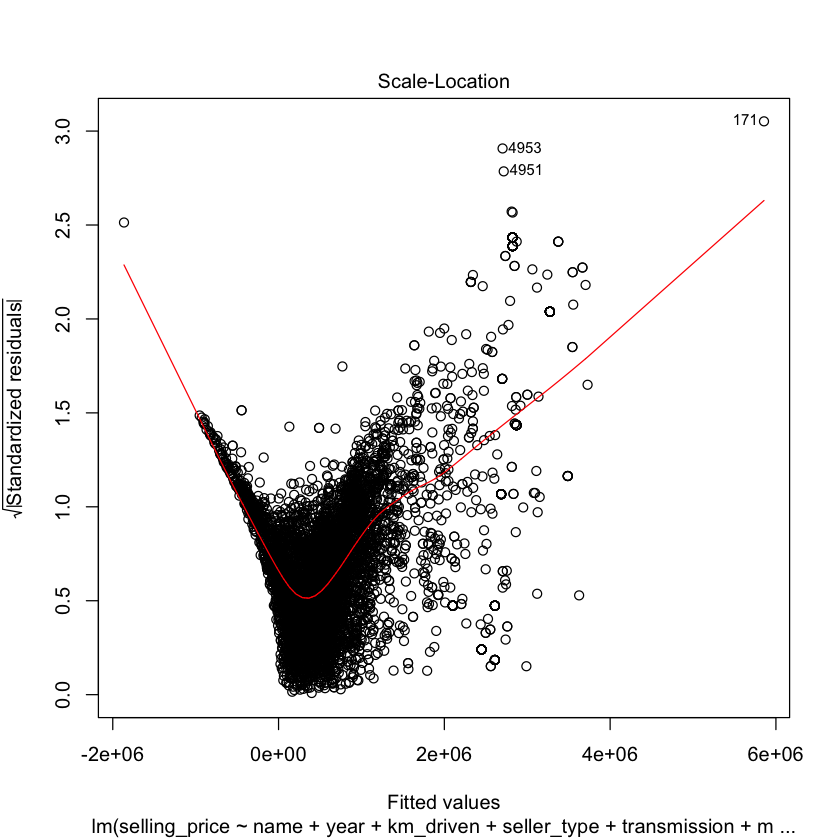

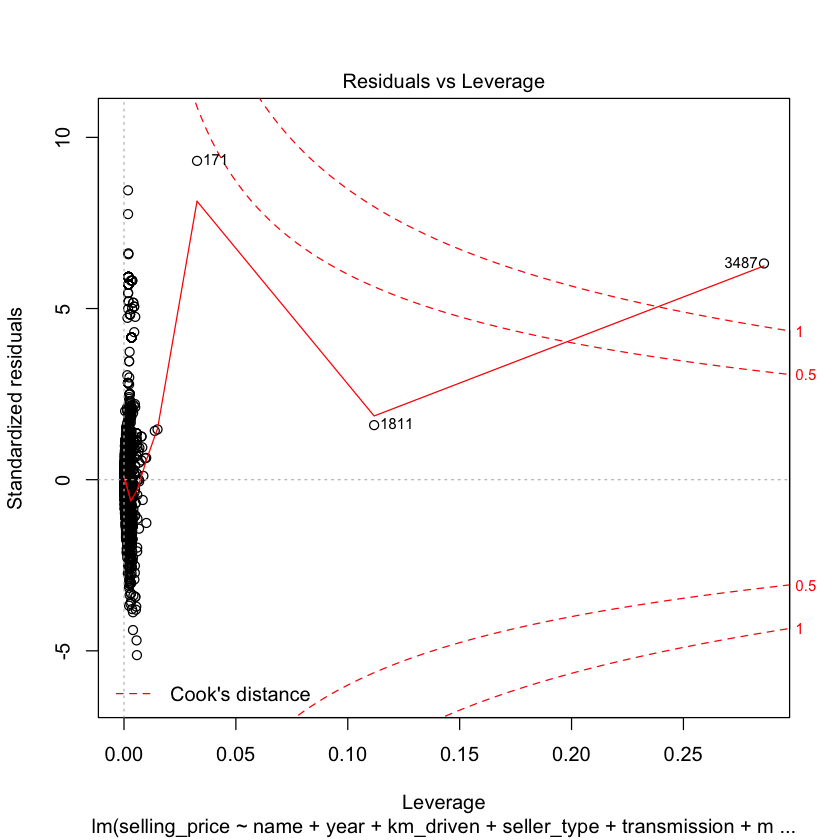

In [34]:
plot(main_lr)

In [35]:
pred_lr <- predict(main_lr, newdata = testSet)
error_lr <- testSet$selling_price - pred_lr
RMSE_lr <- round(sqrt(mean(error_lr^2)),2)
RMSE_lr

[1] 445772

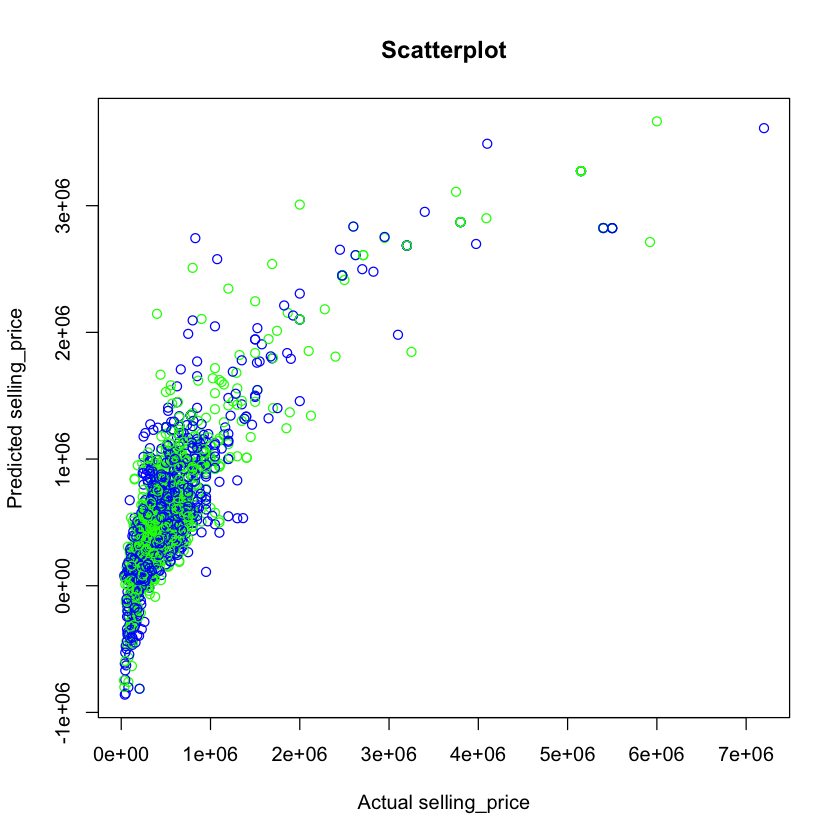

In [36]:
plot(testSet$selling_price,pred_lr, main="Scatterplot", col = c("green","blue"), xlab = "Actual selling_price", ylab = "Predicted selling_price")

<h1> This will mark the Start of the Random Forest part of the project
</h1>

In [37]:
rf <- randomForest(selling_price~.,data = trainSet)

rf


Call:
 randomForest(formula = selling_price ~ ., data = trainSet) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 3

          Mean of squared residuals: 22452106273
                    % Var explained: 96.53

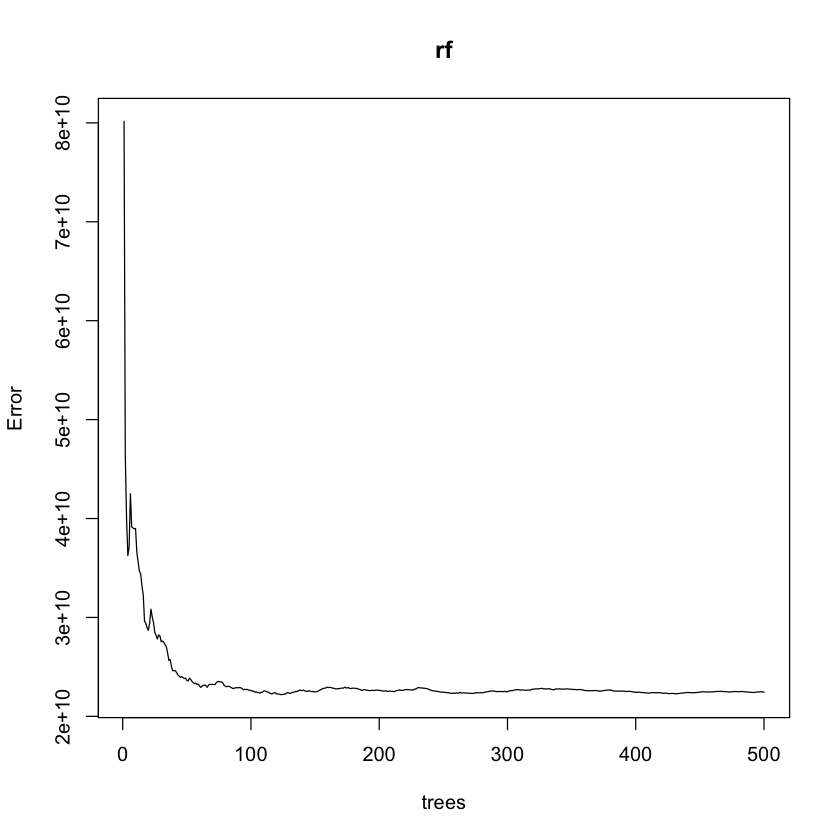

In [38]:
plot(rf)

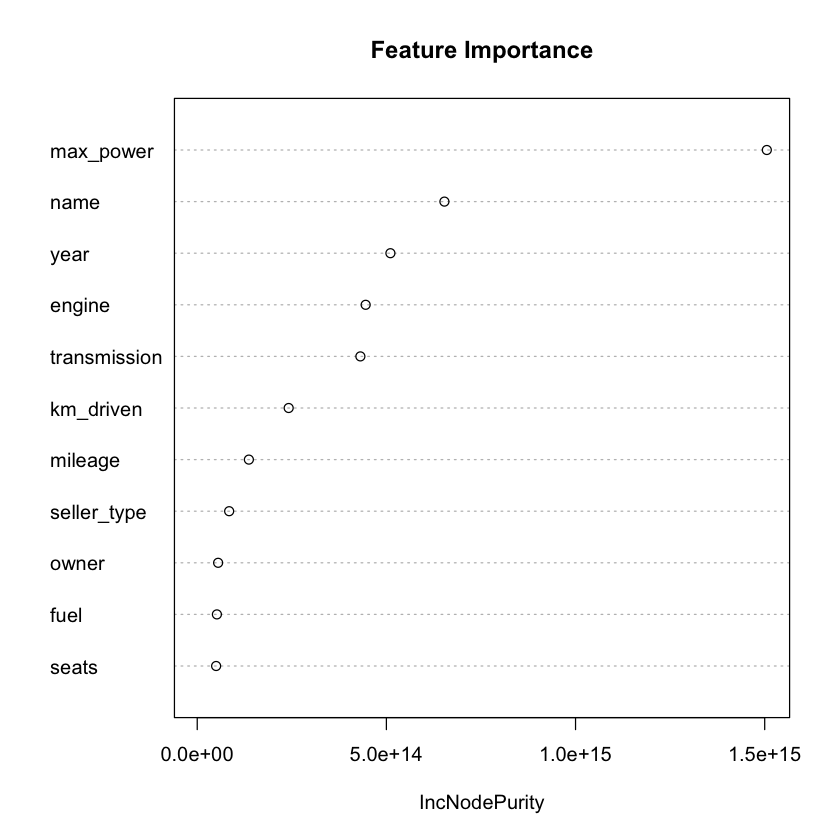

In [39]:
varImpPlot(rf, main ='Feature Importance')

In [40]:
predictrf <- predict(rf, testSet)
error_rf <- testSet$selling_price - predictrf
RMSE_rf <- round(sqrt(mean(error_rf^2)),2)
RMSE_rf

[1] 139091.6

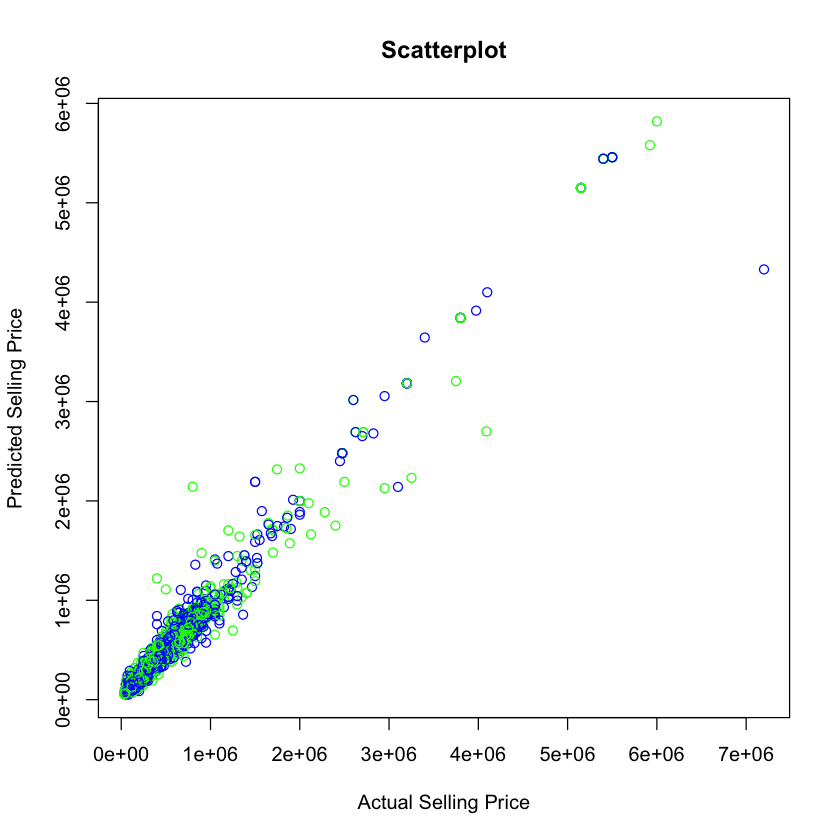

In [41]:
plot(testSet$selling_price,predictrf, main="Scatterplot", col = c("green","blue"), xlab = "Actual Selling Price", ylab = "Predicted Selling Price")

<h1> This will mark the Start of the Decision Tree part of the project. We are preidcting Brand name
</h1>

In [42]:
# CART Modeling via rpart
library(rpart)
library(rpart.plot)

treeFit <- rpart(name~.,data=trainSet,method = 'class')
print(treeFit)

n= 6502 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

  1) root 6502 4550 0 (0.3 0.013 0.057 0.18 0.06 0.048 0.029 0.095 0.089 0.028 0.006 0.0078 0.0037 0.0071 0.0018 0.0054 0.022 0.015 0.01 0.0034 0.0089 0.00092 0.00046 0.0072 0.00031 0.00062 0.00077 0.00046 0.00015 0.00062 0.00015 0.00015)  
    2) engine< 1298.5 3335 1506 0 (0.55 0.0021 0.036 0.2 0.0021 0.014 0.03 0.013 0.069 0.041 0.0087 0.015 0 0 0 0 0.015 0 0.0042 0 0 0 0 0 0.0006 0 0 0 0 0 0 0)  
      4) engine>=1223.5 854  138 0 (0.84 0 0 0 0 0 0 0 0.1 0.033 0.029 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0) *
      5) engine< 1223.5 2481 1368 0 (0.45 0.0028 0.049 0.27 0.0028 0.019 0.041 0.017 0.059 0.044 0.0016 0.021 0 0 0 0 0.02 0 0.0056 0 0 0 0 0 0.00081 0 0 0 0 0 0 0)  
       10) engine< 1073.5 1122  344 0 (0.69 0 0 0.095 0 0.0018 0.09 0.0018 0.03 0.059 0 0.019 0 0 0 0 0.008 0 0 0 0 0 0 0 0.0018 0 0 0 0 0 0 0) *
       11) engine>=1073.5 1359  802 3 (0.25 0.0052 0.089 0.41 0.0052 0.034 0 0.03 0.082 0

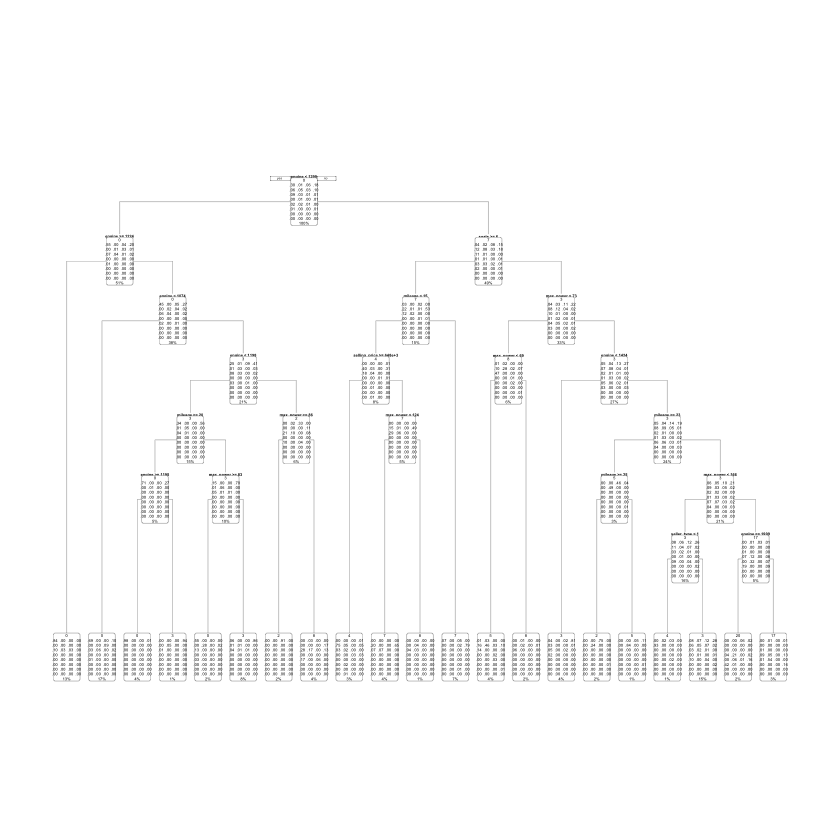

In [43]:
rpart.plot(treeFit, type=1)

In [44]:
pred <- predict(treeFit, testSet, type="class") 
accuracy <- table(pred, testSet$name)
sum(diag(accuracy))/sum(accuracy)

[1] 0.6623616

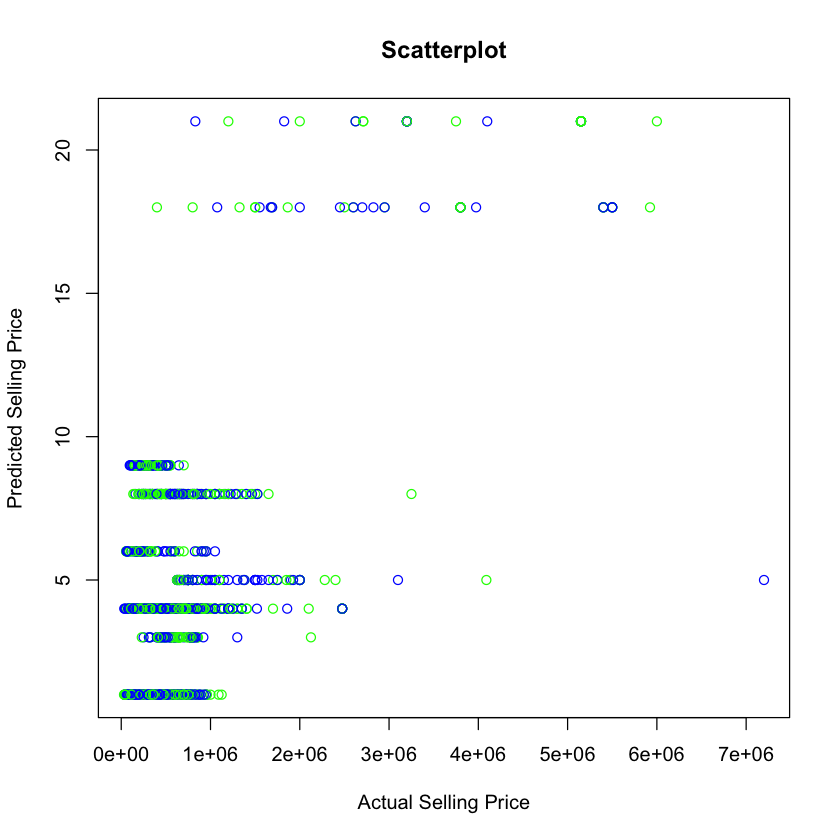

In [45]:
plot(testSet$selling_price,pred, main="Scatterplot", col = c("green","blue"), xlab = "Actual Selling Price", ylab = "Predicted Selling Price")